- `transpose`: `torch.transpose(input, dim0, dim1)`
    - `swapaxies`/`swapdims`
        - `torch.swapaxes(input, axis0, axis1)`: Alias for `torch.transpose()`.
        - `torch.swapdims(input, dim0, dim1)`: Alias for `torch.transpose()`.
    - `permute`
        - `transpose` 只交换两个轴（axis），`permute` 可以对所有的轴进行重排序
    - `torch.einsum()`
    - `.T`
- 变换的是轴（axis/dimension），在内存上的存储未变，变换的是各个轴上的 stride；
    - 影响的只是 view 视图方式，即以什么样的顺序或维度来查看或者使用这个 tensor
    - 内存上，越后边的维度越相连，实际应用中，大部分的变换都是集中中最后的几个轴里的；
        - 或者理解上从物理意义出发，每个轴都有自己的实际具体含义
        ```
        # [1, 8, 32, 128]
        # [bsz, seqlen, heads, head_dim]
        keys = keys.transpose(1, 2)
        # [1, 32, 8, 128]
        # [bsz, heads, seqlen, head_dim]
        
        # xq: [1, 8, 32, 128]
        xq = xq.transpose(1, 2)
        # [1, 32, 8, 128]
        
        # keys.transpose(2, 3): [1, 8, 128, 8]
        torch.matmul(xq, keys.transpose(2, 3)) / math.sqrt(128)
        # [1, 32, 8, 8]
        ```
- torch 中的 tensor 与 numpy 中的 ndarray 用法上几乎没有差别

In [2]:
from IPython.display import Image
import torch

In [4]:
x = torch.arange(16).reshape(2, 2, 4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])

In [47]:
# x[0]
x[0, :, :]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [48]:
# x[1]
x[1, :, :]

tensor([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])

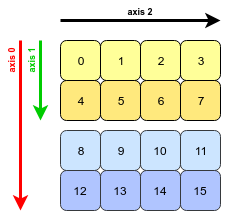

In [37]:
# 内存上，越后边的维度越相连，
# 从后往前拓展, axis2->axis1->axis0
Image('./imgs/axis0-1-2.png')

In [51]:
x[1, 0, :]

tensor([ 8,  9, 10, 11])

In [5]:
x.is_contiguous()

True

In [6]:
x.dtype

torch.int64

## 内存结构分析

In [52]:
# [2, 2, 4]
# 8: 2*4
# 4: 4
# 1: 1
x.stride()

(8, 4, 1)

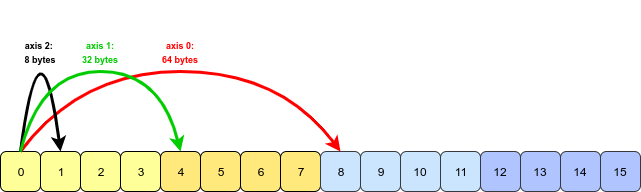

In [10]:
Image('./imgs/axies-flat.png')

In [53]:
x[0]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [54]:
x[1]

tensor([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])

## 2d transpose

In [55]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])

In [56]:
x.stride()

(8, 4, 1)

In [16]:
x.transpose(1, 2).stride()

(8, 1, 4)

In [57]:
x.transpose(1, 2)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]])

### 交换 axis 0 与 axis 1

In [59]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])

In [58]:
x.transpose(0, 1)

tensor([[[ 0,  1,  2,  3],
         [ 8,  9, 10, 11]],

        [[ 4,  5,  6,  7],
         [12, 13, 14, 15]]])

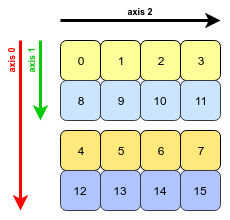

In [36]:
Image('./imgs/axis-swap.png')

In [28]:
torch.equal(x.transpose(1, 0), x.transpose(0, 1))

True

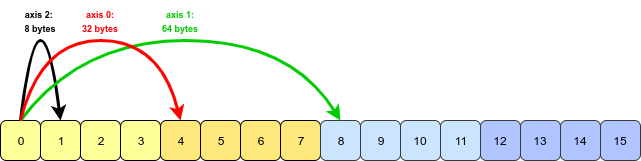

In [25]:
Image('./imgs/axis-swap-flat.png')

In [60]:
print(x.stride())
print(x.transpose(0, 1).stride())

(8, 4, 1)
(4, 8, 1)


## 3d transpose

In [61]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]])

In [62]:
x.T

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])

In [64]:
print(x.stride())
print(x.T.stride())

(8, 4, 1)
(1, 4, 8)


In [20]:
# 2, 2, 4 => (4, 2, 2)
x.transpose(0, 2)

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])

In [21]:
x.permute((2, 1, 0))

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])

In [22]:
torch.einsum('ijk->kji', x)

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])

In [43]:
x.transpose(-3, -1)

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])

In [44]:
x.transpose(0, -1)

tensor([[[ 0,  8],
         [ 4, 12]],

        [[ 1,  9],
         [ 5, 13]],

        [[ 2, 10],
         [ 6, 14]],

        [[ 3, 11],
         [ 7, 15]]])